<p><a href="https://colab.research.google.com/github/ifmg-betim/2023.2_AUT.040_ProcSin/blob/main/Ex/Ex07_FiltrosDigitais_SEU_NOME.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

## **ANÁLISE E APLICAÇÃO DE FILTROS EM SINAIS DE ECG**

INTEGRANTES:

`[LUCAS HENRIQUE DOS ANJOS OLIVEIRA] (0034868)` 

`[MARIANA GOMES BRANDÃO VIDOTTI (00*****)]`




___

**O QUE SÃO DADOS ECG?**

Primeiramente é preciso entender o que é uma ECG de fato. A sigla ECG significa Eletrocardiograma, já seus dados são informações obtidas a partir de um exame chamado de eletrocardiografia. Exame, esse, que registra a atividade elétrica do coração de um ser vivo. 

Na área da medicina, esse exame é realizado utilizando eletrodos em partes vitais do corpo do paciente, como o peito, braços e pernas. Esses eletrodos são responsáveis pela captação de impulsos elétricos gerados pelo coração. 

Após uma análise rápida do que é um Eletrocardiograma, vamos entender o que são seus dados. Basicamente, os dados recebidos pels eletrodos colocados no corpo do paciente são captados por uma máquina, e assim é gerado um gráfico com as informações principais recebidas. Neste gráfico, são demonstradas as diferenças nas fases de ciclo cardíaco, como a contração e o relaxamento das câmaras do coração, essas informações e diferenças nas fases são importantes para a detecção de ritmo cardíaco, presença de arritmias e até mesmo indicar possíveis problemas cardíacos (infarto é um exemplo mais comum). 


___

**GERANDO UM SINAL ECG NO PYTHON**

Como primeiro passo, será necessário gerar um sinal ECG no Python para que o mesmo possa ser analisado. 

In [9]:
#IMPORTANDO AS PRINCIPAIS BIBLIOTECAS A SEREM USADAS. 

import cv2 #Biblioteca OpenCv para uso de imagens
import matplotlib.pyplot as plt #Biblioteca para exibição de gráficos. 
import neurokit2 as nk #Biblioteca para processamento de dados Neurofisiológicos.
from scipy import signal
import numpy as np 
from scipy.io import wavfile
import biosppy.signals.ecg as ecg


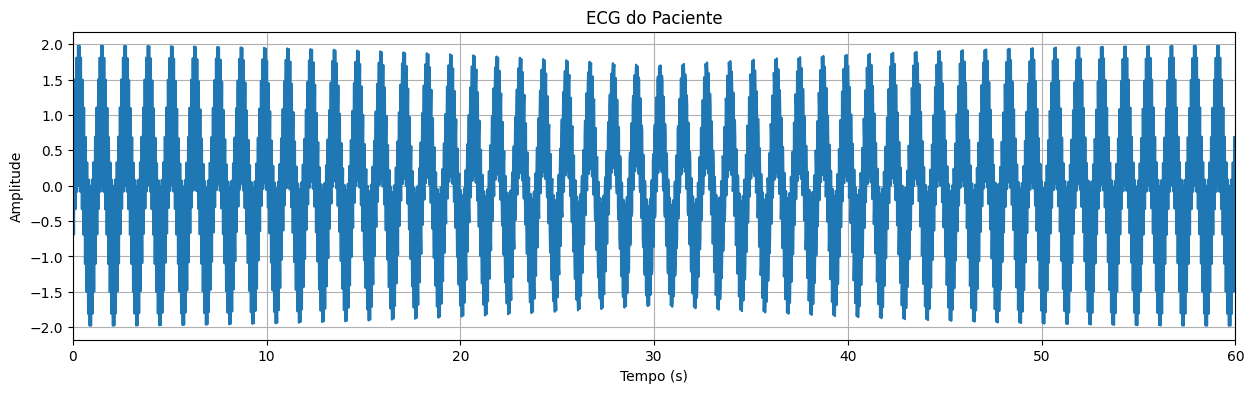

In [83]:
# ABAIXO CÓDIGO PARA INSERÇÃO DE UM SINAL DE ECG PARA ANÁLISE POSTERIOR. 

# Solicitar os parâmetros do sinal de ECG
frequencia_cardiaca = float(input("Digite a frequência cardíaca em bpm: "))
tempo_total = float(input("Digite o tempo total em segundos: "))

# Parâmetros do sinal de ECG
amplitude = 1.0  # amplitude do sinal
amplitude_ruido = 1.0  # amplitude do ruído
frequencia_ruido = 12.5  # frequência do ruído

# Conversão da frequência cardíaca para o período do ciclo cardíaco
periodo_cardiaco = 60 / frequencia_cardiaca
# Variável para implementar o número de pontos a serem exibidos na ECG.
num_pontos = int(tempo_total * frequencia_cardiaca)

# Geração do eixo de tempo
tempo = np.linspace(0, tempo_total, num_pontos)

# Geração do sinal ECG aleatório
sinal_ecg = amplitude * np.sin(2 * np.pi * tempo / periodo_cardiaco)
ruido = amplitude_ruido * np.sin(2 * np.pi * frequencia_ruido * tempo) # Considerando ruidos causados por ambientes externos (eletrodos mal fixados, vibrações nos locais de medição)

# Adicionar o ruído ao sinal de ECG
sinal_ecg_ruidoso = sinal_ecg + ruido

# Plot do sinal ECG ruidoso
plt.figure(figsize=(15,4))
plt.plot(tempo, sinal_ecg_ruidoso)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('ECG do Paciente')
plt.xlim(-0,60)
plt.grid(1)
plt.show()


___

**O QUE FOI OBSERVADO?**

Percebe-se que a ECG exibida para o paciente encontra-se com certa poluição de ruídos, o que proporciona uma certa dificuldade para leitura de um profissional competende da área. Ou seja, um médico não poderia gerar um diagnóstico confiável ao paciente a partir do gráfico de ECG apresentado acima. 


**O QUE PODE SER FEITO?**

Como visto em sala, para a remoção de ruídos é indicado a aplicação de filtros do tipo FIR e IIR, dois filtros que são indicados e aplicados para remoção de ruídos em sinais, não exclusivamente de ECG's, mas também sinais de áudio (como visto no exercício 7 - Filtros Digitais). 

___